# Stanford CS224N: Lecture 1 - Intro & Word Vectors

# <span style = "color: blue"> Lecture (강의 내용) </span>

## <span style = "color : skyblue"> 1. Introduction (~ 16:01) </span>

16:01분까지는 전반적인 개요에 대한 설명이 주를 이루고 있습니다. 담당교수가 NLP에 대해 가지고 있는 생각을 중점으로 강의를 들으시면 되겠습니다.

* Key question for artifical intelligence and human-computer interaction is how to get computers to be able to understand the information conveyed in human languages

> Artificial Intelligence, 즉 인공지능과 인간-컴퓨터 상호작용에 있어 중요한 요소 중 하나는 컴퓨터가 어떻게 인간 언어에 담긴 맥락을 이해할 수 있을까에 대한 질문입니다.

<br>

### **gpt-3 모델이 중요하다고 교수가 생각하는 이유:**

* gpt-3 model is the first step on *universal models*. It is a trained up one extremely large model on every knowledge of human world. So people no longer need specific models. Just one single model that understands anything.

> 교수는 GPT-3 모델이 *유니버셜 모델*로 가기 위한 첫번째 단계라고 생각합니다.
> 유니버셜 모델은 인간 사회의 모든 지식을 담은 매우 방대한 모델로서, 상황에 따라 각자의 모델을 사용하는 것이 아닌 모든 것을 이해하는 단 하나의 모델만을 사용하게 만드는 모델입니다.

<br>

<img src = 'week1_1.png' width = '700'>

### **gpt-3 모델 작동 예시**

* gpt-3 can predict following words, but just predicting one word at a time to complete text.
> GPT-3 모델은 따라오는 단어를 하나씩 예측하여 텍스트를 완성할 수 있습니다. <br> 예시 : 일론 머스크 트위터
* if given couple of examples, gpt-3 can follow ideas and patterns.
> GPT-3 모델에 예시들을 주면, GPT-3 모델은 그 예시의 패턴과 아이디어를 따라할 수 있습니다. <br> 예시: 문장을 SQL 문법의 문장으로 바꿀 때

## <span style = "color : skyblue"> 2. Wordnet & semantics (16:01 ~ 26:54) </span>

16:01분부터 23:39분까지 WordNet 모델과 고전 NLP 모델의 한계에 대해 설명하고 있습니다. 개념에 대한 설명을 주로 진행하고 있습니다.

* WordNet: organize words and terms into both synonyms set of words that can mean the same things and hypernyms which correspond to ISA relationships
> WordNet은 단어와 명사를 동의어 세트와 상의어, 하의어 세트로 구분해 둔 모델입니다.

### **단점:**

1. 뉘앙스를 이해할 수 없기에 많이 부족합니다.
> 예시: proficient(능숙한) <-> good(좋은)은 동의어지만, 일부 의미에서만 동의어입니다.
2. 새로운 단어를 이해하지 못합니다.
> 지금 이 순간도 새로운 단어들이 생겨나기 때문에 keep-up-date가 불가능합니다.
3. 주관적입니다.

### **이렇게 고전 NLP가 문제인 이유는 단어가 discrete symbol, 즉 단어를 하나의 별개의 기호로 취급했기 때문입니다.**

* Traditional NLP represent these symbol as one word vector.
> 고전 NLP는 이러한 기호를 하나의 단어 벡터로 나타냈습니다.
* So it needs to have huge vectors corresponding to the number of words >= 500,000 dimensional vector
> 단어에 갯수에 비례한 벡터의 개수를 가지기 때문에, 벡터의 크기가 최소 500,000개를 넘어갑니다.
* Word vectors do not have natural notion of similarity.
> 단어 벡터는 유사성에 대한 자연스러운 개념을 가지고 있지 않습니다. <br>
> 예시: Seattle Hotel에 대해 검색할 때, Seattle Hotel에 대한 결과도 나타내길 원하는데, 단어가 각각의 벡터로 나타났기 때문에 기계가 학습할 수 없습니다.

### **해결책: distributional semantics -> 단어의 의미는 단어 주위에 있는 단어들의 빈도수에 의해 결정됩니다.**

<img src = 'week1_2.png' width = '700'>

* The words placed around the word banking are context words that will represent banking
> "Banking" 단어 주위에 있는 단어들은 "context words"들로, "banking"을 나타내게 됩니다.

* Based on looking at the words that occur in context as vectors build up dense real valued vector for each word, that in some sense represents the meaning of that word
> 단어 주위의 "context word"의 분포에 따라 각 단어에 대한 벡터를 만들 수 있고, 이 벡터는 그 단어를 나타냅니다. <br>
> 예시 : 단어 "Banking"은 주변 단어들의 분포에 따라 300개 크기 차원의 벡터로 나타낼 수 있고, 비슷한 단어끼리 묶여질 수 있습니다.

## <span style = "color : skyblue"> Word2vec (26:54 ~ 37:27) </span>

Word2vec 모델에 대한 설명과 objective function이 어떻게 산출되었는지 수식을 전개하는 방식으로 설명하고 있습니다. 수식 부분에 대한 설명을 주석 형태로 달아 두었습니다. 강의를 들으면서 같이 보면 되겠습니다.

* Word2vec (Mikolov et al. 2013): framework for learning word vectors

<br>

### **방법**

1. have a large corpus ("body") of text
> "corpus"는 라틴어로 텍스트라는 의미를 함축하고 있습니다.
2. choose a fixed vocabulary to get rid of rare words
> 텍스트 뭉치에서 중요하지 않은 희귀 단어를 제거합니다.
3. create vector for each word
objective: find out what's a good vector for each word
> Word2vec은 단어를 숫자벡터로 변환하는 encoder의 역할을 수행하는 모델입니다. word2vec의 목적은 각 단어에 있어 최선의 벡터를 찾아내는 것입니다.
4. learn word vectors from a big pile of text through distributional similarity
(what words occur in the context of other words)
> word2vec은 텍스트 간의 distributional similarity을 통해 벡터를 할당합니다. 뒷 슬라이들에서 어떠한 방식으로 진행하는지 설명하고 있습니다. 
5. based on the current words, calculate the probability of a context word occuring given the center word according to our current model
> 벡터를 할당함으로서, "center word"가 주어졌을 때 주위의 단어인 "context word"가 발생하는 확률을 구할 수 있습니다.
6. keep adjusting the word vectors to maximize this probability
> 위 확률이 최대가 될 때까지 단어 벡터를 조정합니다.

<img src = 'week1_3.png' width = '700' align = 'left'>

### **word2vec 모델 개요**

* Have a piece of text choose our center word
> 텍스트에서 분석할 "center word"를 정합니다.
* A model predicts the probability of context words given the center word, then moves to the next word and do the same calculations and keep on chunking
> 모델은 "center word"에 따른 "context words"가 나올 확률을 계산한 후, 그 다음 단어로 넘어가 동일한 과정으로 처리한 후 결과값을 쌓아나갑니다.

### Word2vec likelihood function

<br>

<img src = 'week1_4.png' width = '900'>

<br> 

$P(w_{t+j}|w_t;\theta)$ = center word가 $w_t$일 때 context word $w_{t+j}$가 나올 확률

$m$ = center word를 예측하기 위해 살펴보는 context word 범위의 크기

※  j = 0일 때 $w_{t+j}$는 center word인 $w_t$와 동일해지므로 j = 0일때는 제거해야 합니다.

$\displaystyle \prod_{-m \le j \le m} $ = 정해진 크기 -m 과 m 사이 조건부확률의 파이 곱

$t = 1, ..., T$ = center word 각각의 위치  

$\displaystyle \prod_{t=1} ^{T} $ = t = 1일때부터 T까지의 파이 곱

$\theta$ = 최적화해야 하는 모든 변수들

likelihood (가능도) $L(\theta)$ = 변수 $\theta$가 주어졌을 때 context word가 발생할 가능성


### Word2vec Objective Function

<br>

<img src = 'week1_5.png' width = '900'>

<br> 

Objective function (목적함수) $J(\theta)$은 cost, loss으로도 사용할 수 있고, 목적함수가 최소가 되어야 예측 정확성이 최대가 됩니다.

앞서 가능도 함수 likelihood = $L(\theta)$에서 곱의 합인 파이합을 사용했습니다. 하지만, 계산하는 데 있어 곱보다는 합이 쉬우므로
양 식에 log를 붙여두어 log likelihood function으로 만듭니다.

그리고 목적함수를 최소로 만들어야 하기 때문에 식에다가 $-\frac{1}{T}$을 곱해주면,

Word2vec의 목적함수인 $J(\theta) = -\frac{1}{T}logL(\theta)$을 산출할 수 있습니다.


### $P(w_{t+j}|w_t;\theta)$ 계산


<br>

<img src = 'week1_6.png' width = '900'>

<br> 


center word가 주어졌을 때 context word가 나타날 확률인 $P(w_{t+j}|w_t;\theta)$을 어떻게 구할 수 있을까요?

Word2vec 모델은 각 단어에 두 가지의 단어 벡터를 할당합니다.

w가 center word로 쓰였을 때 = $v_w$
w가 context word로 쓰였을 때 = $u_w$

특정한 center word C와 context word O가 주어졌을 때, O가 context word로 쓰인 벡터 $u_O$와 C가 center word로 쓰인 벡터 $v_C$의 벡터 곱을 구하면 두 단어간의 유사도를 구할 수 있습니다.

두 단어 벡터가 +/+ 혹은 -/-라면 확률은 증가할 것이고,
두 단어 벡터가 +/- 혹은 -/+라면 확률은 감소할 것입니다.

$u_O$와 $v_C$의 벡터 곱을 구하면, 두 제곱합간의 계산을 하기 위해 exp()함수를 적용해줍니다.

또한, 모든 확률의 합은 1로 합쳐져야 하기에, 식의 분모에 전체 벡터곱의 합을 곱해줍니다.

이렇게 하여 probability distribution을 완성할 수 있습니다.

## <span style = "color : skyblue">Gradient & Chain Rule (37:27 ~)</span>
37분부터 gradient에 대한 설명이 주를 이루고 있습니다. 60분 이후에는 학생의 질문을 받습니다. 수고 많으셨습니다.

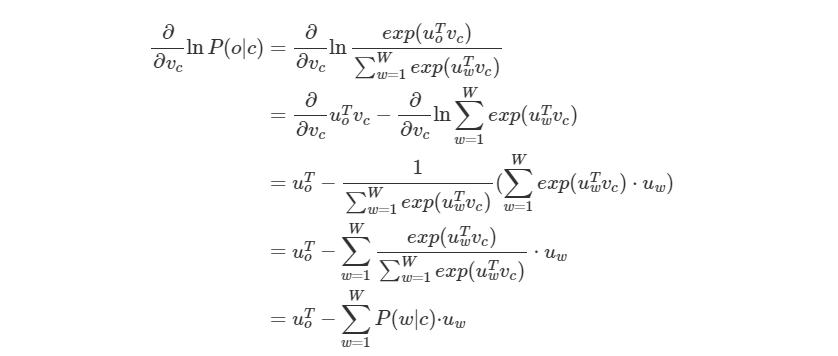

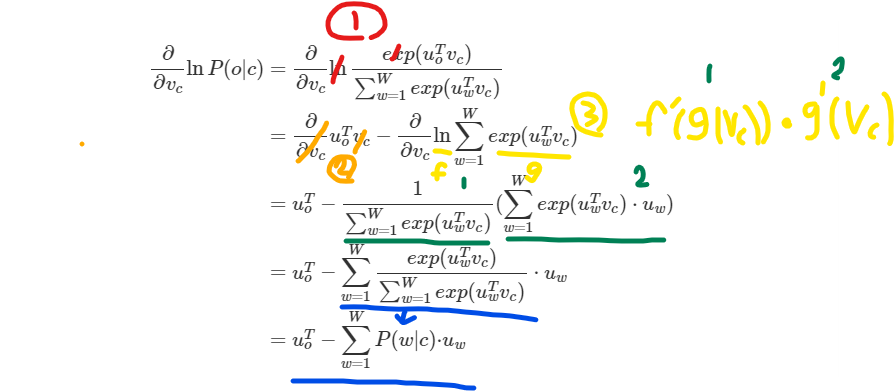

# <span style = "color: blue"> 딥 러닝을 이용한 자연어 처리 입문 </span>

출처: [위키닥스 링크](https://wikidocs.net/22660)

자연어 처리 입문 강좌에서 소개하는 word2vec 모델의 두 학습 방식을 빠르게 짚고 넘어가겠습니다.

## <span style = "color : skyblue"> CBOW (Continuous Bag of Words) </span>

CBOW는 앞선 CS224n 강좌에서 소개한 주변에 있는 단어들을 입력으로 중간에 있는 단어들을 예측하는 방법입니다.

<img src = "week1_8.png" width = "700">

- 예문 : "The fat cat sat on the mat"

CBOW는 주변 context word인 ['The', 'fat', 'cat', 'on', 'the', 'mat']으로부터 center word인 'sat'을 예측합니다.

중심 단어를 예측하기 위해서 앞, 뒤로 몇 개의 단어를 볼지를 결정해야 하는데 이 범위를 윈도우(window)라고 합니다.

앞선 강좌에서는 윈도우(window)를 $m$으로 정의했습니다.

Word2vec은 은닉층이 다수인 딥러닝 모델이 아니라 은닉층이 하나인 얕은 신경망 모델입니다.

CBOW의 인공 신경망을 도식화하면 이와 같습니다. 

<img src = 'week1_9.png' width = '700'>

입력층 (Input layer)에는 $V$ 크기의 앞, 뒤로 사용자가 정한 윈도우 크기 범위 $m$ 안에 있는 주변 단어들의 one-hot vector가 들어갑니다. $W_{V X M}$크기의 가중치를 곱해 투사층으로 투사합니다.

투사층 (Projection Layer)는 크기가 $M$인 벡터로, 입력층 m개 크기 벡터들의 $P(w_{t+j}|w_t;\theta)$ 계산을 마친 벡터가 하나의 벡터로 할당하여 들어갑니다.

출력층 (Output layer)는 $W_{M X V}$ 벡터를 다시 곱해주어 본래 입력층 벡터의 크기인 $V$로 다시 만들어주고, context word에 따른 center word를 출력하는 레이어입니다.

입력으로 들어오는 윈도우 $M$ 안의 주변 단어의 원-핫 벡터와 가중치 W행렬의 곱은 투사층에서 만나 이 벡터들의 평균인 벡터를 구하고, 이 벡터들을 평균낸 벡터를 두번째 가중치 행렬 W'와 곱해 출력층에서 출력합니다.

## <span style = "color : skyblue"> Skip-gram (Continuous Bag of Words) </span>

CBOW가 context word를 통해 center word를 예측했다면, skip-gram은 그 정반대로 center word를 통해 context word를 예측합니다.

skip-gram의 인공신경망은 다음과 같습니다.

<img src = 'week1_10.png' width = '500'>